# Customer Segmentation and Model Analysis

## Imports

### Libraries

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [222]:
path = '../dataset/customer_segmentation.csv'
df = pd.read_csv(path)

## Exploring and Cleaning Data

In [223]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [224]:
df.shape

(2240, 29)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [226]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Replace the missing values in Income with the mean Income of our Data

In [227]:
df['Income'] = df['Income'].fillna(np.mean(df['Income']))

In [228]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [229]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [230]:
categorical_cols = ['Education', 'Marital_Status'] 

for col in categorical_cols:
    print("Value Count For:")
    print(df[col].value_counts())
    print()

Value Count For:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Value Count For:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64



#### Converting the Date from object to datetime object

In [231]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Feature Engineering

Calculating Age for Customers

In [232]:
df['Age'] = 2025 - df['Year_Birth']
df.drop(columns='Year_Birth', inplace=True)
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

Gathering the Teenhome and Kidhome Columns in one Totalchildren Column 

In [233]:
df['Totalchildren'] = df['Teenhome'] + df['Kidhome']
df.drop(columns=['Teenhome', 'Kidhome'], inplace=True)
df['Totalchildren']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Totalchildren, Length: 2240, dtype: int64

In [234]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Age', 'Totalchildren'],
      dtype='object')

Summing over all the Spending Columns on One Total_Spending Column 

In [235]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']

In [236]:
df['Total_Spending'] = df[spend_cols].sum(axis=1)
df.drop(columns=spend_cols, inplace=True)
df['Total_Spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2240, dtype: int64

Changing the Dt_Customer column into a Customer_Since column that represents how many days the customer has been with us

In [237]:
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days
df.drop(columns='Dt_Customer', inplace=True)
df['Customer_Since']

0       4763
1       4213
2       4412
3       4239
4       4261
        ... 
2235    4481
2236    4119
2237    4255
2238    4256
2239    4722
Name: Customer_Since, Length: 2240, dtype: int64

## Visualizing Data

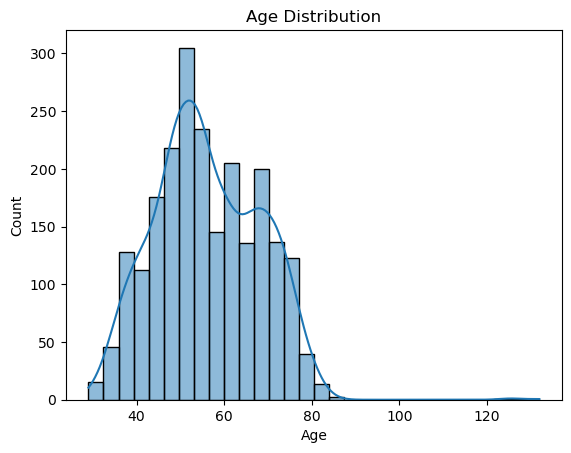

In [238]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

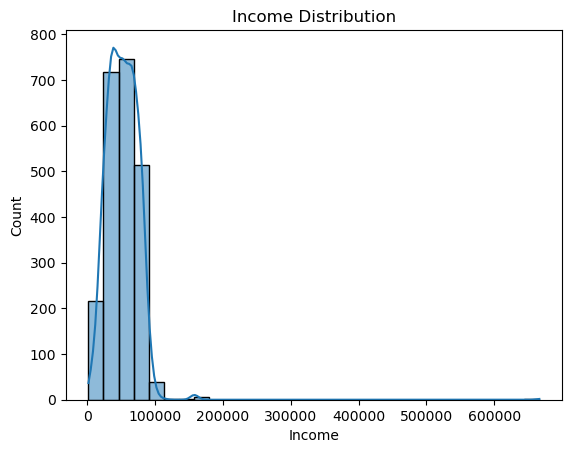

In [239]:
sns.histplot(df['Income'],bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

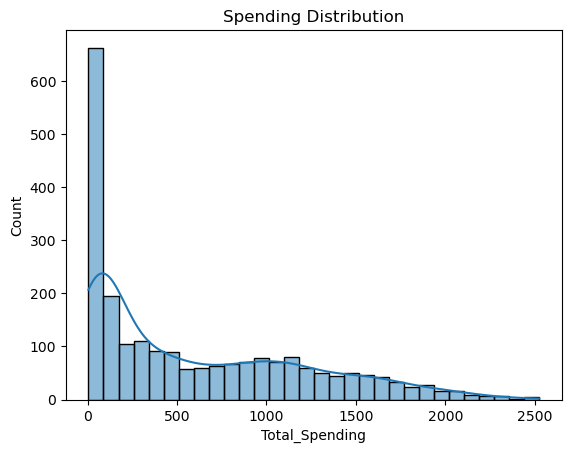

In [240]:
sns.histplot(df['Total_Spending'],bins=30,kde=True)
plt.title("Spending Distribution")
plt.show()

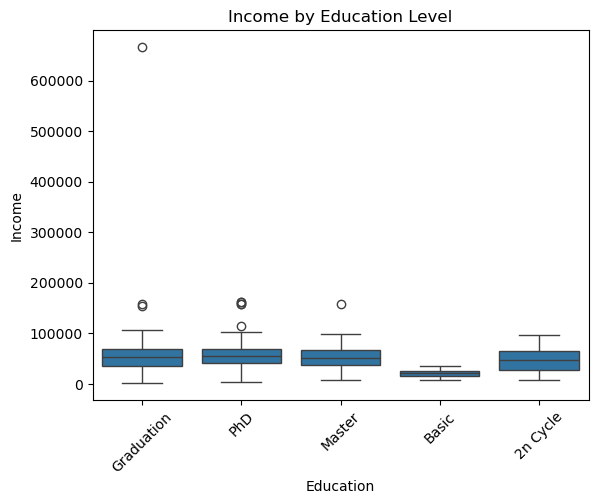

In [241]:
sns.boxplot(x='Education', y= 'Income', data=df)
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.show()

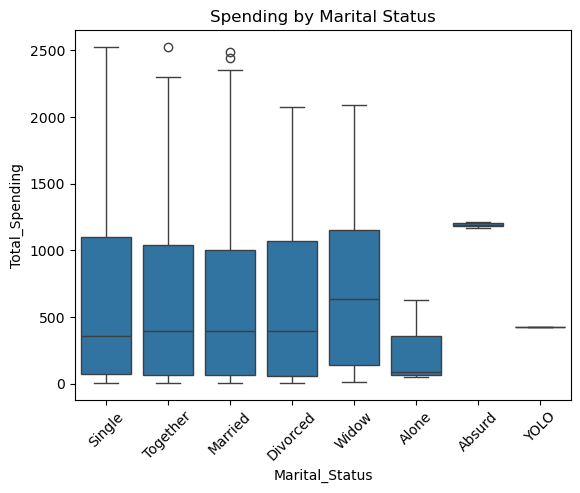

In [242]:
sns.boxplot(x='Marital_Status', y= 'Total_Spending', data=df)
plt.xticks(rotation=45)
plt.title('Spending by Marital Status')
plt.show()

In [243]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Totalchildren', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [244]:
corr = df[['Income', 'Age', 'Total_Spending', 'Recency', 'NumStorePurchases', 'NumWebPurchases']].corr()

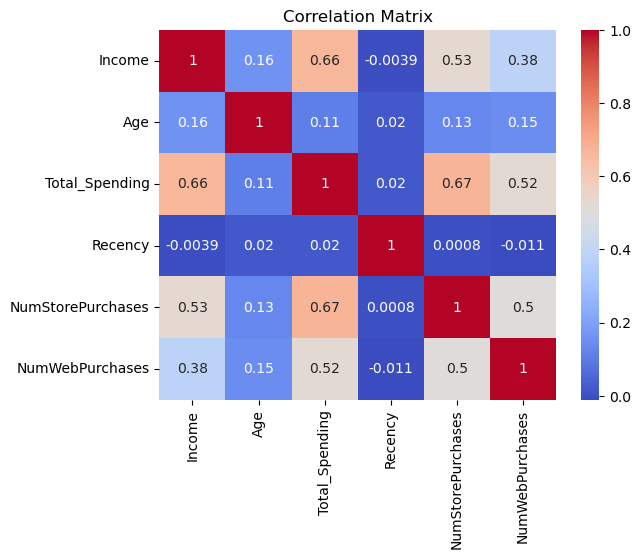

In [245]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

## Applying Clustering to Dataset

### Imports

In [246]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

### Encoding Categorical Features

In [247]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Scale Numerical Features

In [248]:
numeric_cols = df_encoded.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop('ID', errors='ignore')

scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [249]:
df_scaled

,ID,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,0.235327,0.307039,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.283830,...,True,False,False,False,False,False,True,False,False,False
1,2174,-0.235826,-0.383664,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,...,True,False,False,False,False,False,True,False,False,False
2,4141,0.773633,-0.798086,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,...,True,False,False,False,False,False,False,True,False,False
3,6182,-1.022732,-0.798086,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,...,True,False,False,False,False,False,False,True,False,False
4,5324,0.241519,1.550305,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.283830,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0.358568,-0.107383,-0.168236,1.769263,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,...,True,False,False,False,False,True,False,False,False,False
2236,4001,0.470064,0.237969,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,...,False,False,True,False,False,False,False,True,False,False
2237,7270,0.189106,1.446700,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.28014,3.523233,...,True,False,False,False,True,False,False,False,False,False
2238,8235,0.679035,-1.419719,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.28014,-0.283830,...,False,True,False,False,False,False,False,True,False,False


In [250]:
df_scaled.columns

Index(['ID', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Totalchildren', 'Total_Spending', 'Customer_Since',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

### Using K-Means For Clustering Data
Using Elbow Method to Decide Which k to pick First

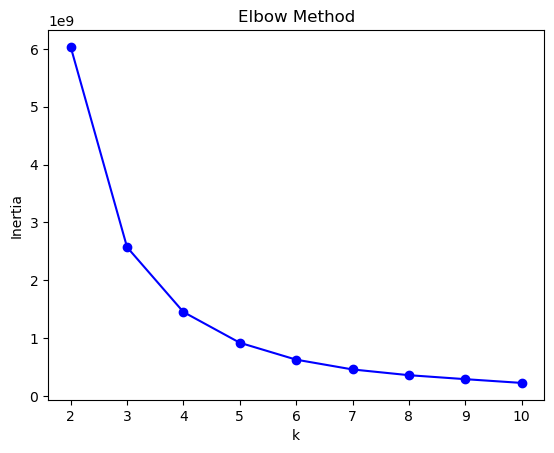

In [251]:
X = df_scaled.select_dtypes(include=['int64','float64'])

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Since Elbow Method Shows very High Inertia in k Ranges [2:4] and much less Inertia in k Ranges [6:10], the best k will be 4 or 5 clusters.

### Applying K-Means with the 2 options we got

In [252]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
labels4 = kmeans4.fit_predict(X)

kmeans5 = KMeans(n_clusters=5, random_state=42)
labels5 = kmeans5.fit_predict(X)

### Evaluating each Model

#### Calculating the Silhouette Coefficient for the Models

In [253]:
score4 = silhouette_score(X, labels4)
score5 = silhouette_score(X, labels5)

print("Silhouette Score for k=4:", score4)
print("Silhouette Score for k=5:", score5)

Silhouette Score for k=4: 0.5758538500504231
Silhouette Score for k=5: 0.5668255230354653


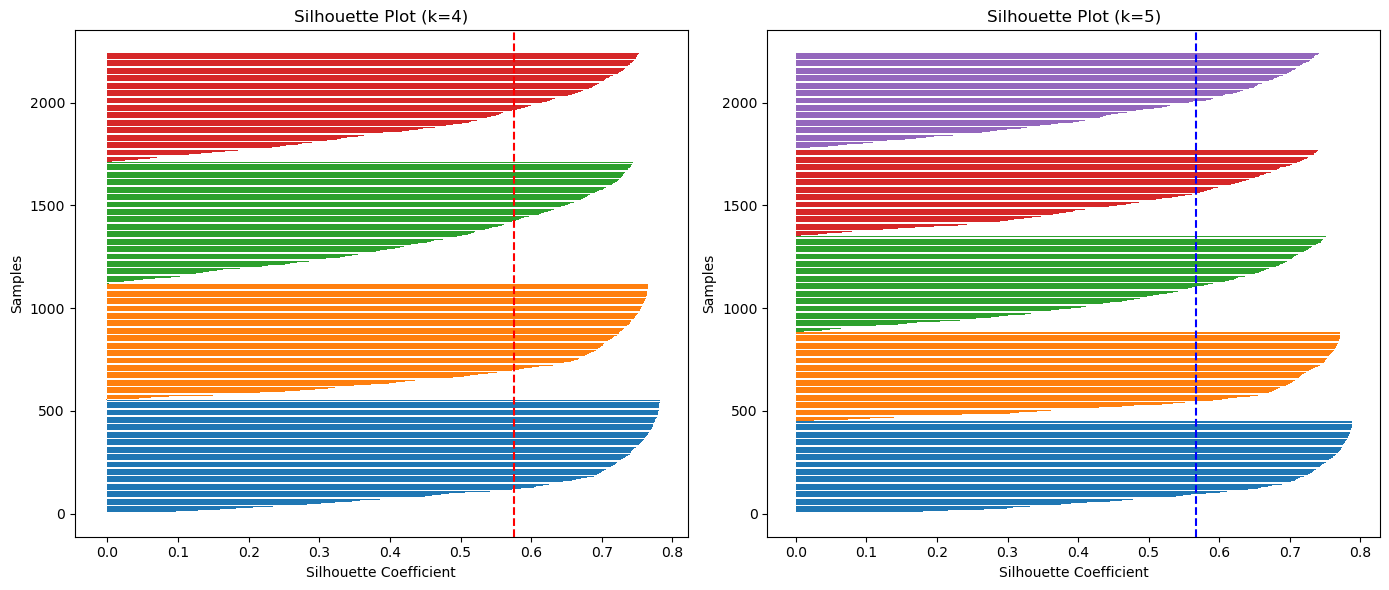

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- k=4 ---
silhouette_vals4 = silhouette_samples(X, labels4)
y_lower, y_upper = 0, 0
for i in range(kmeans4.n_clusters):
    cluster_silhouette_vals4 = silhouette_vals4[labels4 == i]
    cluster_silhouette_vals4.sort()
    y_upper += len(cluster_silhouette_vals4)
    axes[0].barh(range(y_lower, y_upper), cluster_silhouette_vals4)
    y_lower += len(cluster_silhouette_vals4)

axes[0].axvline(score4, color="red", linestyle="--")
axes[0].set_title("Silhouette Plot (k=4)")
axes[0].set_xlabel("Silhouette Coefficient")
axes[0].set_ylabel("Samples")

# --- k=5 ---
silhouette_vals5 = silhouette_samples(X, labels5)
y_lower, y_upper = 0, 0
for i in range(kmeans5.n_clusters):
    cluster_silhouette_vals5 = silhouette_vals5[labels5 == i]
    cluster_silhouette_vals5.sort()
    y_upper += len(cluster_silhouette_vals5)
    axes[1].barh(range(y_lower, y_upper), cluster_silhouette_vals5)
    y_lower += len(cluster_silhouette_vals5)

axes[1].axvline(score5, color="blue", linestyle="--")
axes[1].set_title("Silhouette Plot (k=5)")
axes[1].set_xlabel("Silhouette Coefficient")
axes[1].set_ylabel("Samples")

plt.tight_layout()
plt.show()


We notice that Silhouette Coefficient for k = 4 is slightly bigger than the one for k = 5, that indicates better preformance for the k = 4 model.

### Visualize Clusters

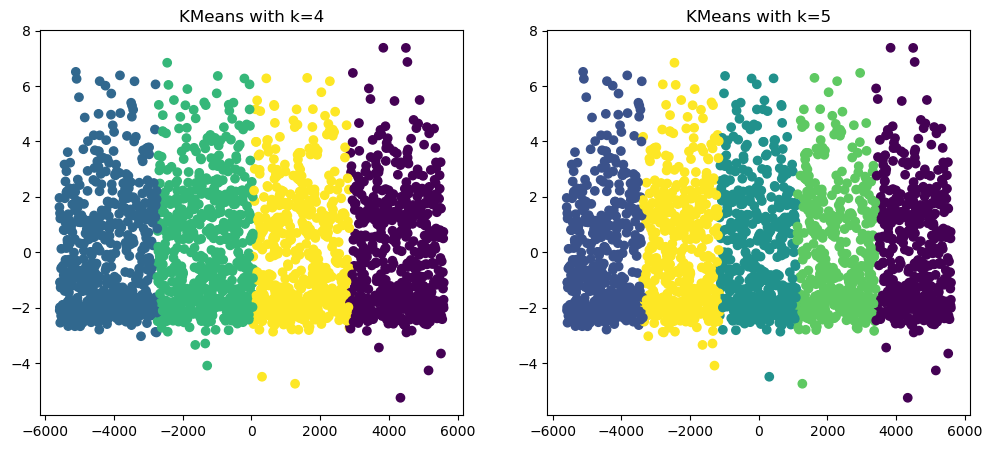

In [255]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels4, cmap='viridis')
plt.title("KMeans with k=4")

plt.subplot(1,2,2)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels5, cmap='viridis')
plt.title("KMeans with k=5")

plt.show()

### Assigning Clusters to Data
Since we picked k=4 now we should label the produced Clusters to the original data.

In [256]:
df['Clusters'] = labels4
df['Clusters'].value_counts()

Clusters
2    594
1    564
0    555
3    527
Name: count, dtype: int64

### Profile Clusters
average Age, Income, Spending, Recency, etc. for each cluster.

In [258]:
cluster_profile = df.groupby('Clusters')[numeric_cols].mean()
cluster_profile

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totalchildren,Total_Spending,Customer_Since
Clusters,,,,,,,,,,,,,,,,,,,,
0,53285.446413,46.057658,2.302703,4.030631,2.628829,5.774775,5.309910,0.059459,0.061261,0.063063,0.055856,0.016216,0.012613,3.0,11.0,0.136937,56.127928,0.956757,596.527928,4465.172973
1,51642.556747,49.099291,2.453901,4.023050,2.537234,5.751773,5.278369,0.079787,0.079787,0.067376,0.067376,0.012411,0.003546,3.0,11.0,0.152482,55.982270,0.960993,598.847518,4455.191489
2,52581.101028,50.708754,2.265993,4.249158,2.875421,5.865320,5.412458,0.084175,0.077441,0.084175,0.074074,0.020202,0.006734,3.0,11.0,0.164983,56.313131,0.919192,636.449495,4452.819865
3,51424.751910,50.531309,2.277040,4.022770,2.590133,5.762808,5.256167,0.066414,0.079696,0.075901,0.058824,0.003795,0.015180,3.0,11.0,0.140417,56.356736,0.967742,588.451613,4440.512334
